# 读取数据

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #指定默认字体  
plt.rcParams['axes.unicode_minus']=False  #解决负号'-'显示为方块的问题

In [139]:
road = r"E:\双十一美妆业务.csv"
data = pd.read_csv(road)
data.head(2)

,update_time,id,title,price,sale_count,comment_count,店名
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂


In [140]:
import copy 
df1 = copy.deepcopy(data)
df1.head(2)

,update_time,id,title,price,sale_count,comment_count,店名
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂


In [141]:
data.shape

(27598, 7)

In [142]:
# 查看各字段信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27598 entries, 0 to 27597
Data columns (total 7 columns):
update_time      27598 non-null object
id               27598 non-null object
title            27598 non-null object
price            27598 non-null float64
sale_count       25244 non-null float64
comment_count    25244 non-null float64
店名               27598 non-null object
dtypes: float64(3), object(4)
memory usage: 1.5+ MB


In [143]:
data['店名'].value_counts()

悦诗风吟    3021
佰草集     2265
欧莱雅     1974
雅诗兰黛    1810
倩碧      1704
美加净     1678
欧珀莱     1359
妮维雅     1329
相宜本草    1313
兰蔻      1285
娇兰      1193
自然堂     1190
玉兰油     1135
兰芝      1091
美宝莲      825
资生堂      821
植村秀      750
薇姿       746
雅漾       663
雪花秀      543
SKII     469
蜜丝佛陀     434
Name: 店名, dtype: int64

In [408]:
data['price'].count()          #非空元素计算

27512

In [409]:
data['price'].min()            #最小值

1.0

In [410]:
data['price'].max()            #最大值

11100.0

In [411]:
data['price'].idxmin()         #最小值的位置，类似于R中的which.min函数

Timestamp('2016-11-14 00:00:00')

In [412]:
data['price'].idxmax()         #最大值的位置，类似于R中的which.max函数

Timestamp('2016-11-14 00:00:00')

In [413]:
data['price'].quantile(0.1)    #10%分位数

46.0

In [423]:
data['price'].sum()            #求和

9998507.65

In [420]:
data['price'].mad()            #平均绝对偏差

301.0366029611354

In [ ]:
data['price'].skew()           #偏度

In [421]:
data['price'].kurt()           #峰度

108.79996757948028

In [424]:
data['price'].mean()           #均值

363.42351155859717

In [425]:
data['price'].quantile(0.2)

86.0

In [416]:
data['price'].median()         #中位数

205.0

In [417]:
data['price'].mode()           #众数

0    260.0
dtype: float64

In [418]:
data['price'].var()            #方差

378072.6836377042

In [419]:
data['price'].std()            #标准差

614.8761530891438

In [422]:
data['price'].describe()       #一次性输出多个描述性统计指标

count    27512.000000
mean       363.423512
std        614.876153
min          1.000000
25%         99.000000
50%        205.000000
75%        390.000000
max      11100.000000
Name: price, dtype: float64

In [432]:
for i in range(11):
    print(i,'分位数：',data['price'].quantile(i*0.1))

0 分位数： 1.0
1 分位数： 46.0
2 分位数： 86.0
3 分位数： 118.0
4 分位数： 160.0
5 分位数： 205.0
6 分位数： 260.0
7 分位数： 340.0
8 分位数： 490.0
9 分位数： 760.0
10 分位数： 11100.0


In [435]:
x = [53, 61, 49, 66, 78, 47]
s = pd.Series(x)

# 偏度能够反应分布的对称情况，右偏（也叫正偏），在图像上表现为数据右边脱了一个长长的尾巴
# 这时大多数值分布在左侧，有一小部分值分布在右侧
print(s.skew())

# skew倾斜；偏移；偏斜
# 峰度反应的是图像的尖锐程度：峰度越大，表现在图像上面是中心点越尖锐
# 在相同方差的情况下，中间一大部分的值方差都很小，为了达到和正太分布方差相同的目的
# 必须有一些值离中心点越远，所以这就是所说的“厚尾”，反应的是异常点增多这一现象
# kurt返回数据集的峰值
print(s.kurt())

0.7826325504212567
-0.2631655441038463


# 数据清洗

## 重复数据处理

In [144]:
# 对重复数据做删除

data = data.drop_duplicates(inplace=False)

In [145]:
data.shape

(27512, 7)

In [146]:
# 删除重复值但没改动索引，需重新顺序排列进行重置索引

data.reset_index(inplace=True,drop=True)

In [147]:
import copy 
df2 = copy.deepcopy(data)
df2.head(2)

,update_time,id,title,price,sale_count,comment_count,店名
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂


## 缺失值处理

In [148]:
# 缺失值
# 有两列数据存在缺失值：sale_count, comment_count

data.isnull().any()

update_time      False
id               False
title            False
price            False
sale_count        True
comment_count     True
店名               False
dtype: bool

In [149]:
data.describe()

,price,sale_count,comment_count
count,27512.000000,2.516200e+04,25162.000000
mean,363.423512,1.231605e+04,1121.741197
std,614.876153,5.241236e+04,5277.781581
min,1.000000,0.000000e+00,0.000000
25%,99.000000,2.780000e+02,21.000000
50%,205.000000,1.443000e+03,153.000000
75%,390.000000,6.353000e+03,669.000000
max,11100.000000,1.923160e+06,202930.000000


In [150]:
data.head(2)

,update_time,id,title,price,sale_count,comment_count,店名
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂


In [151]:
pd.DataFrame(data.sale_count).describe()

,sale_count
count,2.516200e+04
mean,1.231605e+04
std,5.241236e+04
min,0.000000e+00
25%,2.780000e+02
50%,1.443000e+03
75%,6.353000e+03
max,1.923160e+06


In [152]:
data.sale_count.max(),data.sale_count.mean(),data.sale_count.min(),data.sale_count.mode()

(1923160.0, 12316.054208727446, 0.0, 0    0.0
 dtype: float64)

In [153]:
# sale_count列的众数

sale_count_mode = data.sale_count.mode()
sale_count_mode

0    0.0
dtype: float64

In [154]:
# comment_count列的众数
comment_count_mode = data.comment_count.mode()
comment_count_mode

0    0.0
dtype: float64

In [155]:
# 使用0来填充缺失值

data = data.fillna(0)

data.isnull().sum()

update_time      0
id               0
title            0
price            0
sale_count       0
comment_count    0
店名               0
dtype: int64

In [156]:
import copy 
df3 = copy.deepcopy(data)
df3.head(2)

,update_time,id,title,price,sale_count,comment_count,店名
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂


# 特征构造

## 商品标题jieba分词

https://github.com/morningx/files/blob/master/Python/jieba-lcut-%E7%B2%BE%E7%A1%AE%E6%A8%A1%E5%BC%8F-%E6%AF%8F%E4%B8%AA%E8%AF%8D%E6%B1%87%E5%94%AF%E4%B8%80-cutall-%E5%85%A8%E6%A8%A1%E5%BC%8F-%E5%AD%98%E5%9C%A8%E9%87%8D%E5%A4%8D%E5%AD%97.png


![Image Name](https://cdn.kesci.com/upload/image/q71i5yl3e2.png?imageView2/0/w/960/h/960)


In [157]:
import jieba

In [158]:
data.head(2)

,update_time,id,title,price,sale_count,comment_count,店名
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂


In [159]:
# lcut方式进行精准分解词汇 不存在重复

title_cut = []

for i in data.title:
    j = jieba.lcut(i)
    title_cut.append(j)

# print(title_cut)

In [162]:
# list(title_cut)

# [['CHANDO', '/', '自然', '堂', ' ', '雪域', '精粹', '纯粹', '滋润霜', '50g',

In [161]:
# 全模式cut_all True,可以分词出有重复的文字存在

title_cut_all = []

for i in data.title:
    j = jieba.lcut(i,cut_all=True)
    title_cut_all.append(j)

print(title_cut_all[0])

['CHANDO', '', '自然', '堂', '', '', '雪域', '精粹', '纯粹', '滋润', '滋润霜', '50g', '', '补水', '保湿', '', '', '滋润', '水', '润', '面霜']


In [163]:
print(title_cut[0])
print(title_cut_all[0])
data['title'][0]

['CHANDO', '/', '自然', '堂', ' ', '雪域', '精粹', '纯粹', '滋润霜', '50g', ' ', '补水', '保湿', ' ', '滋润', '水润', '面霜']
['CHANDO', '', '自然', '堂', '', '', '雪域', '精粹', '纯粹', '滋润', '滋润霜', '50g', '', '补水', '保湿', '', '', '滋润', '水', '润', '面霜']


'CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜'

In [164]:
data['item_name_cut'] = title_cut

In [165]:
data[['title','item_name_cut']].head(2)

,title,item_name_cut
0,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,..."
1,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡..."


In [166]:
import copy 
df4 = copy.deepcopy(data)
df4.head(2)

,update_time,id,title,price,sale_count,comment_count,店名,item_name_cut
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,..."
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡..."


## 初始化商品对应的一二级分类数据

In [167]:
# 给商品添加分类
sub_type = []   
# 子类别
main_type = []  
# 主类别

basic_config_data = """护肤品 套装 套装
护肤品 乳液类 乳液 美白乳 润肤乳 凝乳 柔肤液 亮肤乳 菁华乳 修护乳
护肤品 眼部护理 眼霜 眼部精华 眼膜
护肤品 面膜类 面膜
护肤品 清洁类 洗面 洁面 清洁 卸妆 洁颜 洗颜 去角质 磨砂
护肤品 化妆水 化妆水 爽肤水 柔肤水 补水露 凝露 柔肤液 精粹水 亮肤水 润肤水 保湿水 菁华水 保湿喷雾 舒缓喷雾
护肤品 面霜类 面霜 日霜 晚霜 柔肤霜 滋润霜 保湿霜 凝霜 日间霜 晚间霜 乳霜 修护霜 亮肤霜 底霜 菁华霜
护肤品 精华类 精华液 精华水 精华露 精华素
护肤品 防晒类 防晒霜 防晒喷雾
化妆品 口红类 唇釉 口红 唇彩
化妆品 底妆类 散粉 蜜粉 粉底液 定妆粉 气垫 粉饼 BB CC 遮瑕 粉霜 粉底膏 粉底霜
化妆品 眼部彩妆 眉粉 染眉膏 眼线 眼影 睫毛膏
化妆品 修容类 鼻影 修容粉 高光 腮红
其他 其他 其他"""

In [168]:
basic_config_data.split('\n')
# split每一行进行拆分

['护肤品 套装 套装',
 '护肤品 乳液类 乳液 美白乳 润肤乳 凝乳 柔肤液 亮肤乳 菁华乳 修护乳',
 '护肤品 眼部护理 眼霜 眼部精华 眼膜',
 '护肤品 面膜类 面膜',
 '护肤品 清洁类 洗面 洁面 清洁 卸妆 洁颜 洗颜 去角质 磨砂',
 '护肤品 化妆水 化妆水 爽肤水 柔肤水 补水露 凝露 柔肤液 精粹水 亮肤水 润肤水 保湿水 菁华水 保湿喷雾 舒缓喷雾',
 '护肤品 面霜类 面霜 日霜 晚霜 柔肤霜 滋润霜 保湿霜 凝霜 日间霜 晚间霜 乳霜 修护霜 亮肤霜 底霜 菁华霜',
 '护肤品 精华类 精华液 精华水 精华露 精华素',
 '护肤品 防晒类 防晒霜 防晒喷雾',
 '化妆品 口红类 唇釉 口红 唇彩',
 '化妆品 底妆类 散粉 蜜粉 粉底液 定妆粉 气垫 粉饼 BB CC 遮瑕 粉霜 粉底膏 粉底霜',
 '化妆品 眼部彩妆 眉粉 染眉膏 眼线 眼影 睫毛膏',
 '化妆品 修容类 鼻影 修容粉 高光 腮红',
 '其他 其他 其他']

In [169]:
# 每一行的数据空格分割后，得到单个词汇后存储到数组array

array = []

for i in range(len(config_line.split(' '))):
    print(i)
    print(config_line.split(' ')[i])    
    array.append(config_line.split(' ')[i])

array[0],array[1],array[2]

0
其他
1
其他
2
其他


('其他', '其他', '其他')

## 商品名称配对一级二级目录

In [170]:
# 获取每个商品名称对应的一级品类 二级品类，存储到字典
category_config_map = {}

# 遍历分好类的样本分类进行拆分
for config_line in basic_config_data.split('\n'):
    
    # 每次拆分均初始化数组
    array = []
    
    # 对每行数据进行空格分割
    for i in range(len(config_line.split(' '))):
        
        # 多个分割结果存append到数组内
        array.append(config_line.split(' ')[i])
    
    # 全部的array则为每行数据
    basic_cateogry_list = array
    # print('basic_cateogry_list:',basic_cateogry_list)
    
    # 每行数据的第一个list表值为一级品类
    main_category = array[0]
    # print('main_category:',main_category)
    
    # 每行数据的第二个list表值为二级品类
    sub_category = array[1]
    # print('sub_category:',sub_category)
    
    # 每行数据多余的商品名称作为其余商品名称
    unit_category_list = array[2:-1]
    # print('unit_category_list:',unit_category_list)
    
    for unit_category in unit_category_list:
        # 每个商品名称通过空格进行拆分
        if unit_category and unit_category.strip().strip('\t'):
            
            category_config_map[unit_category] = (main_category,sub_category)
            # 翻转过来，对于 一级品类 二级品牌 后面的每个商品名称对于12级目录
            # 商品为字典的键，一级二级品类为字典的值
            
    # print('category_config_map',category_config_map)

# basic_cateogry_list: ['护肤品', '乳液类', '乳液', '美白乳', '润肤乳', '凝乳', '柔肤液', '亮肤乳', '菁华乳', '修护乳']
# main_category: 护肤品
# sub_category: 乳液类
# unit_category_list: ['乳液', '美白乳', '润肤乳', '凝乳', '柔肤液', '亮肤乳', '菁华乳']
# category_config_map {'乳液': ('护肤品', '乳液类'), '美白乳': ('护肤品', '乳液类'), '润肤乳': ('护肤品', '乳液类'), '凝乳': ('护肤品', '乳液类'), '柔肤液': ('护肤品', '乳液类'), '亮肤乳': ('护肤品', '乳液类'), '菁华乳': ('护肤品', '乳液类')}

In [171]:
category_config_map

{'乳液': ('护肤品', '乳液类'),
 '美白乳': ('护肤品', '乳液类'),
 '润肤乳': ('护肤品', '乳液类'),
 '凝乳': ('护肤品', '乳液类'),
 '柔肤液': ('护肤品', '化妆水'),
 '亮肤乳': ('护肤品', '乳液类'),
 '菁华乳': ('护肤品', '乳液类'),
 '眼霜': ('护肤品', '眼部护理'),
 '眼部精华': ('护肤品', '眼部护理'),
 '洗面': ('护肤品', '清洁类'),
 '洁面': ('护肤品', '清洁类'),
 '清洁': ('护肤品', '清洁类'),
 '卸妆': ('护肤品', '清洁类'),
 '洁颜': ('护肤品', '清洁类'),
 '洗颜': ('护肤品', '清洁类'),
 '去角质': ('护肤品', '清洁类'),
 '化妆水': ('护肤品', '化妆水'),
 '爽肤水': ('护肤品', '化妆水'),
 '柔肤水': ('护肤品', '化妆水'),
 '补水露': ('护肤品', '化妆水'),
 '凝露': ('护肤品', '化妆水'),
 '精粹水': ('护肤品', '化妆水'),
 '亮肤水': ('护肤品', '化妆水'),
 '润肤水': ('护肤品', '化妆水'),
 '保湿水': ('护肤品', '化妆水'),
 '菁华水': ('护肤品', '化妆水'),
 '保湿喷雾': ('护肤品', '化妆水'),
 '面霜': ('护肤品', '面霜类'),
 '日霜': ('护肤品', '面霜类'),
 '晚霜': ('护肤品', '面霜类'),
 '柔肤霜': ('护肤品', '面霜类'),
 '滋润霜': ('护肤品', '面霜类'),
 '保湿霜': ('护肤品', '面霜类'),
 '凝霜': ('护肤品', '面霜类'),
 '日间霜': ('护肤品', '面霜类'),
 '晚间霜': ('护肤品', '面霜类'),
 '乳霜': ('护肤品', '面霜类'),
 '修护霜': ('护肤品', '面霜类'),
 '亮肤霜': ('护肤品', '面霜类'),
 '底霜': ('护肤品', '面霜类'),
 '精华液': ('护肤品', '精华类'),
 '精华水': ('护肤品', '精华类'),
 '精华

## 切割的商品名称12级目录适配

In [172]:
print(len(data))

data.head(2)

27512


,update_time,id,title,price,sale_count,comment_count,店名,item_name_cut
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,..."
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡..."


In [173]:
temp1 = data.item_name_cut[0]
print(temp1)

['CHANDO', '/', '自然', '堂', ' ', '雪域', '精粹', '纯粹', '滋润霜', '50g', ' ', '补水', '保湿', ' ', '滋润', '水润', '面霜']


In [174]:
temp1[0],temp1[1],temp1[2]

('CHANDO', '/', '自然')

In [175]:
len(temp1)

17

In [177]:
# category_config_map

# {'乳液': ('护肤品', '乳液类'),
# '美白乳': ('护肤品', '乳液类'),
# '润肤乳': ('护肤品', '乳液类'),
# '凝乳': ('护肤品', '乳液类'),

In [178]:
category_config_map.get('乳液'),category_config_map.get('乳液')[0],category_config_map.get('乳液')[1]

(('护肤品', '乳液类'), '护肤品', '乳液类')

In [179]:
dict = {'Name': 'Zara', 'Age': 27}

dict.get('Age'),'!!!',dict.get('Sex', "no")

(27, '!!!', 'no')

In [180]:
category_config_map.get('CHANDO','no')

'no'

In [182]:
import copy 
df5 = copy.deepcopy(data)
df5.head(2)

,update_time,id,title,price,sale_count,comment_count,店名,item_name_cut
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,..."
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡..."


In [181]:
data.head(2)

,update_time,id,title,price,sale_count,comment_count,店名,item_name_cut
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,..."
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡..."


In [190]:
for i in temp1:
    print(i)

CHANDO
/
自然
堂
 
雪域
精粹
纯粹
滋润霜
50g
 
补水
保湿
 
滋润
水润
面霜


In [192]:
category_config_map

{'乳液': ('护肤品', '乳液类'),
 '美白乳': ('护肤品', '乳液类'),
 '润肤乳': ('护肤品', '乳液类'),
 '凝乳': ('护肤品', '乳液类'),
 '柔肤液': ('护肤品', '化妆水'),
 '亮肤乳': ('护肤品', '乳液类'),
 '菁华乳': ('护肤品', '乳液类'),
 '眼霜': ('护肤品', '眼部护理'),
 '眼部精华': ('护肤品', '眼部护理'),
 '洗面': ('护肤品', '清洁类'),
 '洁面': ('护肤品', '清洁类'),
 '清洁': ('护肤品', '清洁类'),
 '卸妆': ('护肤品', '清洁类'),
 '洁颜': ('护肤品', '清洁类'),
 '洗颜': ('护肤品', '清洁类'),
 '去角质': ('护肤品', '清洁类'),
 '化妆水': ('护肤品', '化妆水'),
 '爽肤水': ('护肤品', '化妆水'),
 '柔肤水': ('护肤品', '化妆水'),
 '补水露': ('护肤品', '化妆水'),
 '凝露': ('护肤品', '化妆水'),
 '精粹水': ('护肤品', '化妆水'),
 '亮肤水': ('护肤品', '化妆水'),
 '润肤水': ('护肤品', '化妆水'),
 '保湿水': ('护肤品', '化妆水'),
 '菁华水': ('护肤品', '化妆水'),
 '保湿喷雾': ('护肤品', '化妆水'),
 '面霜': ('护肤品', '面霜类'),
 '日霜': ('护肤品', '面霜类'),
 '晚霜': ('护肤品', '面霜类'),
 '柔肤霜': ('护肤品', '面霜类'),
 '滋润霜': ('护肤品', '面霜类'),
 '保湿霜': ('护肤品', '面霜类'),
 '凝霜': ('护肤品', '面霜类'),
 '日间霜': ('护肤品', '面霜类'),
 '晚间霜': ('护肤品', '面霜类'),
 '乳霜': ('护肤品', '面霜类'),
 '修护霜': ('护肤品', '面霜类'),
 '亮肤霜': ('护肤品', '面霜类'),
 '底霜': ('护肤品', '面霜类'),
 '精华液': ('护肤品', '精华类'),
 '精华水': ('护肤品', '精华类'),
 '精华

In [196]:
category_config_map.get('滋润霜')[1],category_config_map.get('滋润霜')[0]

('面霜类', '护肤品')

### 第1行进行适配品类

In [205]:
sub_type1 = []
main_type1 = []

exist = False

for i in temp1:
    print(i)
    if i in category_config_map:
        # exist=True
        sub_type1.append(category_config_map.get(i)[1])
        main_type1.append(category_config_map.get(i)[0])
        print('good')
        break

    if not exist:    
        sub_type.append('其他')
        main_type.append('其他')        

sub_type1, main_type1

CHANDO
/
自然
堂
 
雪域
精粹
纯粹
滋润霜
good


(['面霜类'], ['护肤品'])

### 所有行进行适配品类

In [207]:
data.head(2)

,update_time,id,title,price,sale_count,comment_count,店名,item_name_cut
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,..."
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡..."


In [245]:
len(data)

27512

In [253]:
data_sample = len(data)-27510
print("样本数据：",data_sample)

sub_type_all = []
main_type_all = []

for i_data in range(data_sample):

    exist = False

    for i_temp in data.item_name_cut[i_data]:
        print(i_temp)
        if i_temp in category_config_map:
            # exist=True
            sub_type_all.append(category_config_map.get(i_temp)[1])
            main_type_all.append(category_config_map.get(i_temp)[0])
            print('商品切割的标题在字典找到对应的12级目录停止啦！')
            print(sub_type_all)
            print(main_type_all)
            exist = True
            break

    if not exist:    
        sub_type_all.append('其他')
        main_type_all.append('其他')
        print('没找到对应的12级目录停止了！')
            
print(len(sub_type_all) ,len(main_type_all) )
            


样本数据： 2
CHANDO
/
自然
堂
 
雪域
精粹
纯粹
滋润霜
商品切割的标题在字典找到对应的12级目录停止啦！
['面霜类']
['护肤品']
CHANDO
/
自然
堂
凝
时鲜
颜肌活
乳液
商品切割的标题在字典找到对应的12级目录停止啦！
['面霜类', '乳液类']
['护肤品', '护肤品']
2 2


In [252]:
print(len(sub_type_all),type(sub_type_all),sub_type_all)
print('!!!!!!!!!!!!!!!!!!!!')
print(len(main_type_all),type(main_type_all),main_type_all)

12 <class 'list'> ['面霜类', '乳液类', '化妆水', '清洁类', '面霜类', '清洁类', '面霜类', '化妆水', '精华类', '其他', '化妆水', '面霜类']
!!!!!!!!!!!!!!!!!!!!
12 <class 'list'> ['护肤品', '护肤品', '护肤品', '护肤品', '护肤品', '护肤品', '护肤品', '护肤品', '护肤品', '其他', '护肤品', '护肤品']


In [260]:
data_sample = len(data)
print("样本数据数量：",data_sample)

sub_type_all = []
main_type_all = []

for i_data in range(data_sample):

    exist = False

    for i_temp in data.item_name_cut[i_data]:
        # print(i_temp)
        if i_temp in category_config_map:
            sub_type_all.append(category_config_map.get(i_temp)[1])
            main_type_all.append(category_config_map.get(i_temp)[0])
            # print('商品切割的标题在字典找到对应的12级目录停止啦！')
            # print('sub_type_all：',sub_type_all)
            # print('main_type_all：',main_type_all)
            exist = True
            break

    if not exist:    
        sub_type_all.append('其他')
        main_type_all.append('其他')
        # print('没找到对应的12级目录停止了！')
        # print('sub_type_all：',sub_type_all)
        # print('main_type_all：',main_type_all)
            
print(len(sub_type_all) ,len(main_type_all) )

# 样本数据数量： 27512
# 商品切割的标题在字典找到对应的12级目录停止啦！
# 商品切割的标题在字典找到对应的12级目录停止啦！
# 商品切割的标题在字典找到对应的12级目录停止啦！
# ...
# 没找到对应的12级目录停止了！
# 没找到对应的12级目录停止了！
# 没找到对应的12级目录停止了！
# 27512 27512

样本数据数量： 27512
27512 27512


In [259]:
len(sub_type_all),len(data)

(27512, 27512)

### 一二级品类加入特征

In [261]:
data['sub_type_all'] = sub_type_all
data.head(2)

,update_time,id,title,price,sale_count,comment_count,店名,item_name_cut,sub_type_all
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",面霜类
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡...",乳液类


In [262]:
data['main_type_all'] = main_type_all
data.head(2)

,update_time,id,title,price,sale_count,comment_count,店名,item_name_cut,sub_type_all,main_type_all
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",面霜类,护肤品
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡...",乳液类,护肤品


In [265]:
import copy 
df6 = copy.deepcopy(data)
df6.head(2)

,update_time,id,title,price,sale_count,comment_count,店名,item_name_cut,sub_type_all,main_type_all
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",面霜类,护肤品
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡...",乳液类,护肤品


In [266]:
data['sub_type_all'].value_counts()

其他      13100
清洁类      2922
面霜类      2675
化妆水      1955
底妆类      1790
乳液类      1352
眼部护理     1114
精华类       727
口红类       715
眼部彩妆      604
防晒类       494
修容类        64
Name: sub_type_all, dtype: int64

In [267]:
data['main_type_all'].value_counts()

其他     13100
护肤品    11239
化妆品     3173
Name: main_type_all, dtype: int64

## 构造是否男士专用特征

In [268]:
data.head(2)

,update_time,id,title,price,sale_count,comment_count,店名,item_name_cut,sub_type_all,main_type_all
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",面霜类,护肤品
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡...",乳液类,护肤品


In [271]:
print(data.item_name_cut[0])

['CHANDO', '/', '自然', '堂', ' ', '雪域', '精粹', '纯粹', '滋润霜', '50g', ' ', '补水', '保湿', ' ', '滋润', '水润', '面霜']


In [42]:
'男' in data.item_name_cut[0]

False

In [270]:
'自然' in data.item_name_cut[0]

True

In [275]:
data['item_name_cut'].to_excel("./item_name_cut.xls", index=False)

In [276]:
man = []

for i in range(len(data)):
    if '男' in data.item_name_cut[i]:
        man.append('是')
    elif '男士' in data.item_name_cut[i]:
        man.append('是')
    elif '男生' in data.item_name_cut[i]:
        man.append('是')
    else:
        man.append('否')

In [279]:
man[0:10],len(man),len(data)

(['否', '否', '否', '是', '否', '否', '否', '否', '否', '否'], 27512, 27512)

In [280]:
data['是否男士专用'] = man
data.head(2)

,update_time,id,title,price,sale_count,comment_count,店名,item_name_cut,sub_type_all,main_type_all,是否男士专用
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",面霜类,护肤品,否
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡...",乳液类,护肤品,否


In [281]:
data['是否男士专用'].value_counts()

否    25310
是     2202
Name: 是否男士专用, dtype: int64

In [282]:
import copy 
df7 = copy.deepcopy(data)
df7.head(2)

,update_time,id,title,price,sale_count,comment_count,店名,item_name_cut,sub_type_all,main_type_all,是否男士专用
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",面霜类,护肤品,否
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡...",乳液类,护肤品,否


## 销售额特征

In [283]:
data.head(2)

,update_time,id,title,price,sale_count,comment_count,店名,item_name_cut,sub_type_all,main_type_all,是否男士专用
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",面霜类,护肤品,否
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡...",乳液类,护肤品,否


In [284]:
# 销售额=销售量*价格
data['销售额'] = data.sale_count * data.price
data['销售额'].head(2)

0    3713941.0
1    1575668.0
Name: 销售额, dtype: float64

In [285]:
data.head(2)

,update_time,id,title,price,sale_count,comment_count,店名,item_name_cut,sub_type_all,main_type_all,是否男士专用,销售额
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",面霜类,护肤品,否,3713941.0
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡...",乳液类,护肤品,否,1575668.0


## 购买日期索引

In [288]:
# 转换时间格式
data['update_time'] = pd.to_datetime(data['update_time'])

In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27512 entries, 0 to 27511
Data columns (total 12 columns):
update_time      27512 non-null datetime64[ns]
id               27512 non-null object
title            27512 non-null object
price            27512 non-null float64
sale_count       27512 non-null float64
comment_count    27512 non-null float64
店名               27512 non-null object
item_name_cut    27512 non-null object
sub_type_all     27512 non-null object
main_type_all    27512 non-null object
是否男士专用           27512 non-null object
销售额              27512 non-null float64
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 2.5+ MB


In [290]:
data['update_time'][0:2]

0   2016-11-14
1   2016-11-14
Name: update_time, dtype: datetime64[ns]

In [291]:
# 将时间设置为新的index
data = data.set_index('update_time')
data.head(2)

,id,title,price,sale_count,comment_count,店名,item_name_cut,sub_type_all,main_type_all,是否男士专用,销售额
update_time,,,,,,,,,,,
2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",面霜类,护肤品,否,3713941.0
2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡...",乳液类,护肤品,否,1575668.0


## 日期 特征

In [292]:
# 新增时间“天”为一列
data['day'] = data.index.day
data.head(2)

,id,title,price,sale_count,comment_count,店名,item_name_cut,sub_type_all,main_type_all,是否男士专用,销售额,day
update_time,,,,,,,,,,,,
2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",面霜类,护肤品,否,3713941.0,14
2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡...",乳液类,护肤品,否,1575668.0,14


In [293]:
import copy 
df7 = copy.deepcopy(data)
df7.head(2)

,id,title,price,sale_count,comment_count,店名,item_name_cut,sub_type_all,main_type_all,是否男士专用,销售额,day
update_time,,,,,,,,,,,,
2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",面霜类,护肤品,否,3713941.0,14
2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡...",乳液类,护肤品,否,1575668.0,14


## 导出数据表格

In [294]:
# 删除中文分词的一列
del data['item_name_cut']
data.head(2)

,id,title,price,sale_count,comment_count,店名,sub_type_all,main_type_all,是否男士专用,销售额,day
update_time,,,,,,,,,,,
2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,面霜类,护肤品,否,3713941.0,14
2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,乳液类,护肤品,否,1575668.0,14


In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27512 entries, 2016-11-14 to 2016-11-05
Data columns (total 11 columns):
id               27512 non-null object
title            27512 non-null object
price            27512 non-null float64
sale_count       27512 non-null float64
comment_count    27512 non-null float64
店名               27512 non-null object
sub_type_all     27512 non-null object
main_type_all    27512 non-null object
是否男士专用           27512 non-null object
销售额              27512 non-null float64
day              27512 non-null int64
dtypes: float64(4), int64(1), object(6)
memory usage: 2.5+ MB


In [297]:
# 保存清理好的数据为Excel格式

data.to_excel('clearn_1212.xls',sheet_name='clean_data')

In [298]:
import copy 
df8 = copy.deepcopy(data)
df8.head(2)

,id,title,price,sale_count,comment_count,店名,sub_type_all,main_type_all,是否男士专用,销售额,day
update_time,,,,,,,,,,,
2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,面霜类,护肤品,否,3713941.0,14
2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,乳液类,护肤品,否,1575668.0,14


# 可视化绘图

In [300]:
data.columns

Index(['id', 'title', 'price', 'sale_count', 'comment_count', '店名',
       'sub_type_all', 'main_type_all', '是否男士专用', '销售额', 'day'],
      dtype='object')

In [301]:
data.head(2)

,id,title,price,sale_count,comment_count,店名,sub_type_all,main_type_all,是否男士专用,销售额,day
update_time,,,,,,,,,,,
2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,面霜类,护肤品,否,3713941.0,14
2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,乳液类,护肤品,否,1575668.0,14


## 各品牌SKU数

悦诗风吟的商品数量最多，其次为佰草集、欧莱雅

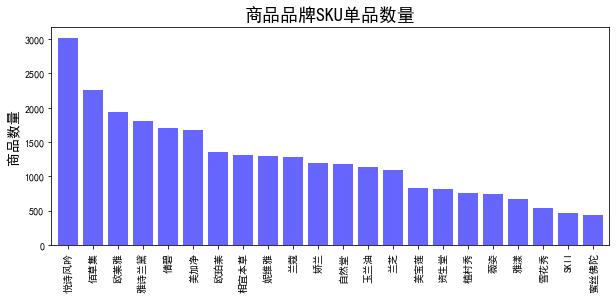

In [310]:
plt.figure(figsize=(10,4))

# 计算各店铺的商品数量
data[u'店名'].value_counts().sort_values(ascending=False).plot.bar(width=0.8,alpha=0.6,color='b')

plt.title(u'商品品牌SKU单品数量',fontsize=18)
plt.ylabel(u'商品数量',fontsize=14)
plt.show();

## 总销量和总销售额

- 相宜本草的销售量和销售额都是最高的
- 销量第二至第五，分别为美宝莲、悦诗风吟、妮维雅、欧莱雅
- 销售额第二至第五，分别为欧莱雅、佰草集、美宝莲、悦诗风吟
- 宝莲、悦诗风吟、欧莱雅都在销量、销售额前五中

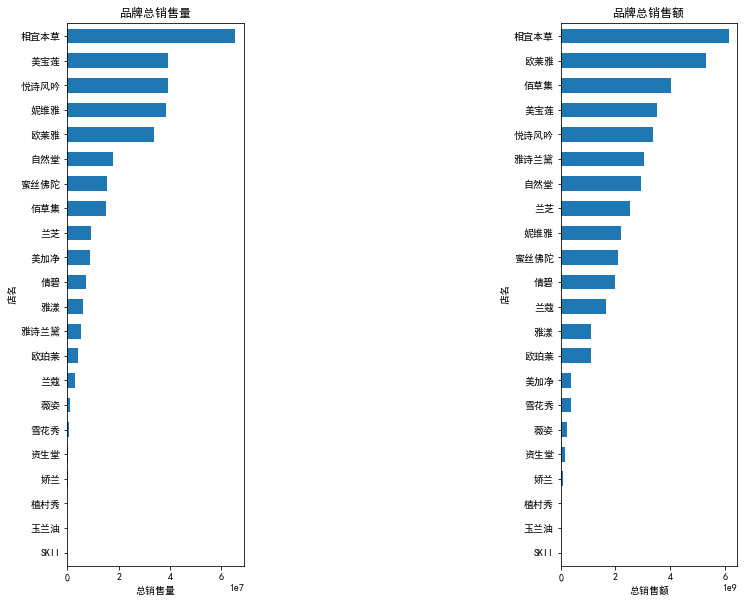

In [313]:
fig,axes = plt.subplots(1,2,figsize=(12,10))

ax1 = data.groupby(u'店名').sale_count.sum().sort_values(ascending=True).plot(kind='barh',ax=axes[0],width=0.6)
ax1.set_title(u'品牌总销售量',fontsize=12)
ax1.set_xlabel(u'总销售量')

ax2 = data.groupby(u'店名')[u'销售额'].sum().sort_values(ascending=True).plot(kind='barh',ax=axes[1],width=0.6)
ax2.set_title(u'品牌总销售额',fontsize=12)
ax2.set_xlabel(u'总销售额')

plt.subplots_adjust(wspace=1.8)
plt.show()

## 类别销售量销售额透视表

In [314]:
data.head(2)

,id,title,price,sale_count,comment_count,店名,sub_type_all,main_type_all,是否男士专用,销售额,day
update_time,,,,,,,,,,,
2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,面霜类,护肤品,否,3713941.0,14
2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,乳液类,护肤品,否,1575668.0,14


In [318]:
data1 = data.groupby('main_type_all')['sale_count'].sum()

data1,data1.index,data1.values

(main_type_all
 其他     133453819.0
 化妆品     43079714.0
 护肤品    133363023.0
 Name: sale_count, dtype: float64,
 Index(['其他', '化妆品', '护肤品'], dtype='object', name='main_type_all'),
 array([1.33453819e+08, 4.30797140e+07, 1.33363023e+08]))

In [ ]:
pd.pivot_table(data,index=['update_time']).head(2)

In [319]:
data2 = data.groupby('sub_type_all')['sale_count'].sum()

data2,data2.index,data2.values

(sub_type_all
 乳液类      11974994.0
 修容类        339687.0
 其他      133453819.0
 化妆水      24766531.0
 口红类      12732472.0
 底妆类      23083538.0
 清洁类      59701823.0
 眼部彩妆      6924017.0
 眼部护理      8404318.0
 精华类       2010843.0
 防晒类       8669759.0
 面霜类      17834755.0
 Name: sale_count, dtype: float64,
 Index(['乳液类', '修容类', '其他', '化妆水', '口红类', '底妆类', '清洁类', '眼部彩妆', '眼部护理', '精华类',
        '防晒类', '面霜类'],
       dtype='object', name='sub_type_all'),
 array([1.19749940e+07, 3.39687000e+05, 1.33453819e+08, 2.47665310e+07,
        1.27324720e+07, 2.30835380e+07, 5.97018230e+07, 6.92401700e+06,
        8.40431800e+06, 2.01084300e+06, 8.66975900e+06, 1.78347550e+07]))

In [324]:
pd.pivot_table(data,index=['main_type_all','sub_type_all'])

comment_count       day       price    sale_count  \
main_type_all sub_type_all                                                      
其他            其他               847.814809  9.018779  348.697381  10187.314427   
化妆品           修容类             1259.078125  9.171875  193.171875   5307.609375   
              口红类             1669.879720  9.019580  198.878615  17807.653147   
              底妆类             1537.416201  9.093296  319.658659  12895.831285   
              眼部彩妆             797.473510  9.127483  205.951821  11463.604305   
护肤品           乳液类              723.030325  9.161243  300.165932   8857.244083   
              化妆水             1239.151918  9.193862  225.084598  12668.302302   
              清洁类             2124.069131  9.098563  251.912611  20431.835387   
              眼部护理             530.155296  8.948833  568.848285   7544.271095   
              精华类              298.015131  8.955983  778.603851   2765.946355   
              防晒类             2230.319838  9.018219  189.728340  17550.119433   
              面霜类              409.363364  8.948037  637.011469   6667.198131   

                                     销售额  
main_type_all sub_type_all                
其他            其他            1.487128e+06  
化妆品           修容类           7.389214e+05  
              口红类           1.876899e+06  
              底妆类           1.897789e+06  
              眼部彩妆          1.006300e+06  
护肤品           乳液类           1.501916e+06  
              化妆水           2.078835e+06  
              清洁类           1.648575e+06  
              眼部护理          2.014615e+06  
              精华类           1.060277e+06  
              防晒类           1.375219e+06  
              面霜类           1.047977e+06

In [334]:
pd.pivot_table(data,index=['main_type_all','sub_type_all'],columns = ['day'],values = ['price','sale_count'])

price                                      \
day                                 5           6           7           8    
main_type_all sub_type_all                                                   
其他            其他            373.226577  368.675288  371.077756  358.373653   
化妆品           修容类           196.000000  196.000000  196.000000  196.000000   
              口红类           211.521829  209.283214  210.985366  208.178193   
              底妆类           330.960199  327.273171  326.296482  325.582915   
              眼部彩妆          219.594118  219.594118  219.594118  210.334328   
护肤品           乳液类           309.315298  309.010662  316.939728  308.837400   
              化妆水           228.871698  233.210092  233.097653  230.616590   
              清洁类           281.777591  278.273958  282.298116  276.142576   
              眼部护理          596.267176  594.340909  594.953846  596.704545   
              精华类           794.930233  794.930233  798.164706  811.694118   
              防晒类           198.217241  198.217241  196.725000  198.185965   
              面霜类           659.684548  661.199812  664.149872  654.718516   

                                                                            \
day                                 9           10          11          12   
main_type_all sub_type_all                                                   
其他            其他            362.849947  372.118088  323.491070  306.950615   
化妆品           修容类           196.000000  196.000000  191.714286  185.200000   
              口红类           208.178193  206.082805  185.059153  175.980577   
              底妆类           321.368932  324.530806  314.367742  310.097744   
              眼部彩妆          210.334328  214.667647  186.688679  175.638298   
护肤品           乳液类           308.930268  302.787792  271.810940  292.179820   
              化妆水           228.782488  229.413077  218.682575  212.459554   
              清洁类           271.864548  291.389043  218.048167  194.237948   
              眼部护理          590.038760  585.458647  582.442000  495.973333   
              精华类           804.752941  808.302326  807.666667  743.020408   
              防晒类           198.185965  198.185965  180.560000  172.760000   
              面霜类           667.782611  672.525994  678.640439  556.435158   

                                                      sale_count  \
day                                 13          14            5    
main_type_all sub_type_all                                         
其他            其他            288.929047  300.965467   9149.953826   
化妆品           修容类           185.200000  187.400000   4696.285714   
              口红类           170.381636  171.245094  15602.621951   
              底妆类           300.450704  298.841727  11230.288557   
              眼部彩妆          190.163265  190.775510  10345.044118   
护肤品           乳液类           284.132679  280.224909   8270.344371   
              化妆水           212.935030  212.071145  10929.915094   
              清洁类           176.889181  178.547489  18878.375000   
              眼部护理          480.192308  469.088608   7498.938931   
              精华类           674.490566  652.788462   2331.313953   
              防晒类           164.831579  165.621053  16043.103448   
              面霜类           522.031531  529.372094   6249.121495   

                                                                      \
day                                   6             7             8    
main_type_all sub_type_all                                             
其他            其他             9252.844692   9179.557278   9219.702184   
化妆品           修容类            4720.000000   4746.000000   4774.285714   
              口红类           15488.309524  15775.792683  15620.939759   
              底妆类           11297.492683  11552.492462  11642.482412   
              眼部彩妆          10348.808824  10352.220588  10511.388060   
护肤品           乳液类            8311.695364   7861.435374   8657.926667   
              化妆水     

In [336]:
pd.pivot_table(data,index=['main_type_all','sub_type_all','day'],values = ['price','sale_count'])

price   sale_count
main_type_all sub_type_all day                         
其他            其他           5    373.226577  9149.953826
                           6    368.675288  9252.844692
                           7    371.077756  9179.557278
                           8    358.373653  9219.702184
                           9    362.849947  9502.057895
...                                    ...          ...
护肤品           面霜类          10   672.525994  5589.406940
                           11   678.640439  6165.248780
                           12   556.435158  7766.610526
                           13   522.031531  7582.831633
                           14   529.372094  9412.570681

[120 rows x 2 columns]

In [340]:
pd.pivot_table(data,index=['main_type_all','sub_type_all'],columns = ['day'],values = ['price','sale_count'],aggfunc=[np.sum])

sum                                   \
                                price                                    
day                                5          6          7          8    
main_type_all sub_type_all                                               
其他            其他            565811.49  562598.49  550679.39  541502.59   
化妆品           修容类             1372.00    1372.00    1372.00    1372.00   
              口红类            17344.79   17579.79   17300.80   17278.79   
              底妆类            66523.00   67091.00   64933.00   64791.00   
              眼部彩妆           14932.40   14932.40   14932.40   14092.40   
护肤品           乳液类            46706.61   46660.61   46590.14   46325.61   
              化妆水            48520.80   50839.80   49649.80   50043.80   
              清洁类            92423.05   93500.05   92876.08   91127.05   
              眼部护理           78111.00   78453.00   77344.00   78765.00   
              精华类            68364.00   68364.00   67844.00   68994.00   
              防晒类            11496.60   11496.60   11016.60   11296.60   
              面霜类           211758.74  210922.74  207214.76  202962.74   

                                                                        \
                                                                         
day                                9          10         11         12   
main_type_all sub_type_all                                               
其他            其他            551531.92  566363.73  362956.98  294365.64   
化妆品           修容类             1372.00    1372.00    1342.00     926.00   
              口红类            17278.79   16898.79   10918.49    9150.99   
              底妆类            66202.00   68476.00   48727.00   41243.00   
              眼部彩妆           14092.40   14597.40    9894.50    8255.00   
护肤品           乳液类            46030.61   46629.32   31801.88   32431.96   
              化妆水            49645.80   50700.29   36519.99   33356.15   
              清洁类            90259.03   94410.05   54730.09   44480.49   
              眼部护理           76115.00   77866.00   55331.99   37198.00   
              精华类            68404.00   69514.00   48460.00   36408.00   
              防晒类            11296.60   11296.60    7222.40    6046.60   
              面霜类           209683.74  213190.74  139121.29  105722.68   

                                                                          \
                                                  sale_count               
day                                13         14          5           6    
main_type_all sub_type_all                                                 
其他            其他            281994.75  290130.71  13871330.0  14119841.0   
化妆品           修容类              926.00     937.00     32874.0     33040.0   
              口红类             9370.99    9075.99   1279415.0   1301018.0   
              底妆类            42664.00   41539.00   2257288.0   2315986.0   
              眼部彩妆            9318.00    9348.00    703463.0    703719.0   
护肤品           乳液类            31822.86   30824.74   1248822.0   1255066.0   
              化妆水            35560.15   35203.81   2317142.0   2408535.0   
              清洁类            41038.29   41244.47   6192107.0   6260384.0   
              眼部护理           37455.00   37058.00    982361.0   1076000.0   
              精华类            35748.00   33945.00    200493.0    201281.0   
              防晒类             6263.60    6293.60    930500.0    930598.0   
              面霜类           102318.18  101110.07   2005968.0   2012511.0   

                                                                            \
                                                                             
day                                 7           8           9           10   
main_type_all sub_type_all                                                   
其他            其他            13622463.0  13930970.0  14443128.0  13673013.0   
化妆品           修容类              33222.0     33420.0     33

## 销售量及金额饼图占比

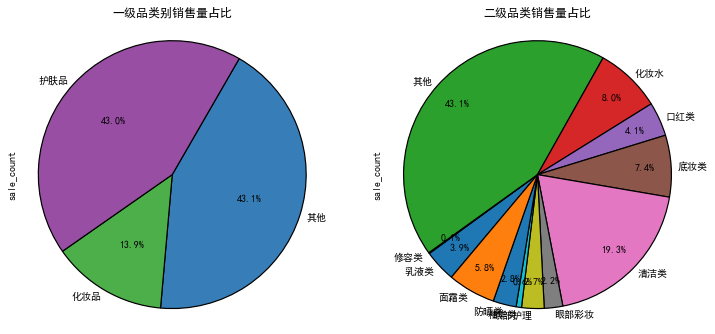

In [353]:
fig,axes = plt.subplots(1,2,figsize=(12,12))

colors = ["#377eb8", "#4daf4a", "#984ea3"]

ax1 = data1.plot(   kind='pie',
                    ax=axes[0],
                    autopct='%.1f%%',
                    # pctdistance=0.8,
                    labels= data1.index,
                    labeldistance = 1.05, 
                    startangle = 60, 
                    radius = 1.1, 
                    colors = colors,
                    counterclock = False, 
                    # 是否逆时针，这里设置为顺时针方向
                    wedgeprops = {'linewidth': 1.2, 'edgecolor':'k'},
                    # 设置饼图内外边界的属性值
                    # textprops = {'fontsize':10, 'color':'k'}, 
                    # 设置文本标签的属性值
                    )
                    
ax1.set_title('一级品类别销售量占比',fontsize=12)

data2 = data.groupby('sub_type_all')['sale_count'].sum()

ax2 = data2.plot(kind='pie',ax=axes[1],autopct='%.1f%%', 
pctdistance=0.8, 
labels= data2.index,
labeldistance = 1.05,
startangle = 230, 
radius = 1.1, 
counterclock = False, 
wedgeprops = {'linewidth': 1.2, 'edgecolor':'k'},
textprops = {'fontsize':10, 'color':'k'}, 
)

ax2.set_title('二级品类销售量占比',fontsize=12)

plt.show()

## 品牌一级品类总销量柱状图

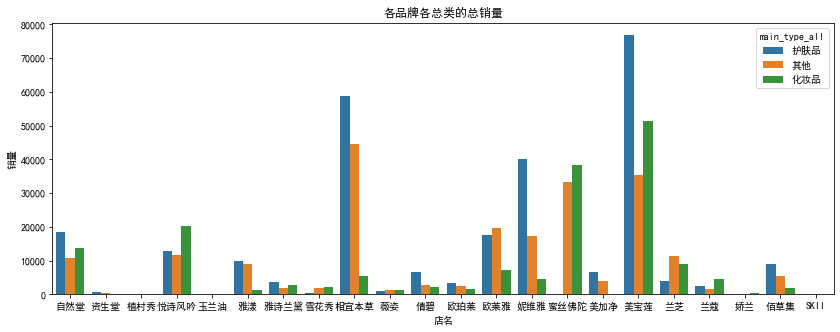

In [362]:
plt.figure(figsize=(14,5))
# saturation饱和；饱和度；饱和状态
sns.barplot(x='店名',y='sale_count',hue='main_type_all',data=data,saturation=0.75,ci=0)
plt.title('各品牌各总类的总销量')
plt.ylabel('销量')
plt.show()

## 品牌二级品类总销量柱状图

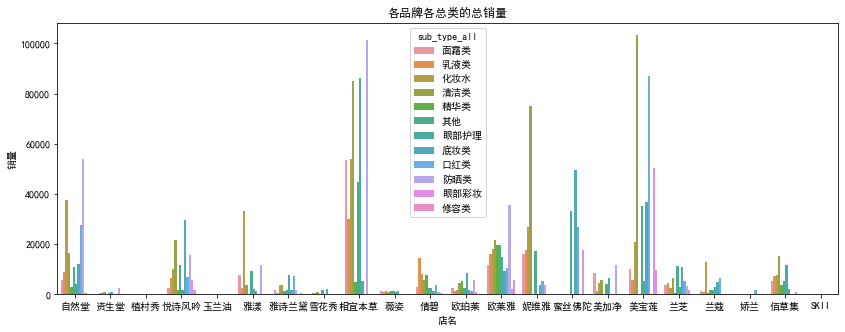

In [363]:
plt.figure(figsize=(14,5))
# saturation饱和；饱和度；饱和状态
sns.barplot(x='店名',y='sale_count',hue='sub_type_all',data=data,saturation=0.75,ci=0)
plt.title('品牌一级品类总销量')
plt.ylabel('销量')
plt.show()

## 品牌评论热度

In [368]:
data.head(1)

,id,title,price,sale_count,comment_count,店名,sub_type_all,main_type_all,是否男士专用,销售额,day
update_time,,,,,,,,,,,
2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,面霜类,护肤品,否,3713941.0,14


In [369]:
data.groupby('店名').comment_count.max().sort_values(ascending=False)

店名
妮维雅     202930.0
悦诗风吟     80392.0
自然堂      39547.0
雅漾       33882.0
美宝莲      28778.0
相宜本草     26037.0
蜜丝佛陀     19392.0
兰芝       16121.0
佰草集      15960.0
欧莱雅      15247.0
雅诗兰黛     12935.0
美加净       9294.0
倩碧        7632.0
兰蔻        6394.0
欧珀莱       5597.0
薇姿        3961.0
雪花秀       3701.0
娇兰        2450.0
资生堂       1571.0
植村秀          0.0
玉兰油          0.0
SKII         0.0
Name: comment_count, dtype: float64

In [370]:
data.groupby('店名').comment_count.min().sort_values(ascending=False)

店名
雪花秀     0.0
雅诗兰黛    0.0
佰草集     0.0
倩碧      0.0
兰芝      0.0
兰蔻      0.0
妮维雅     0.0
娇兰      0.0
悦诗风吟    0.0
植村秀     0.0
欧珀莱     0.0
欧莱雅     0.0
玉兰油     0.0
相宜本草    0.0
美加净     0.0
美宝莲     0.0
自然堂     0.0
薇姿      0.0
蜜丝佛陀    0.0
资生堂     0.0
雅漾      0.0
SKII    0.0
Name: comment_count, dtype: float64

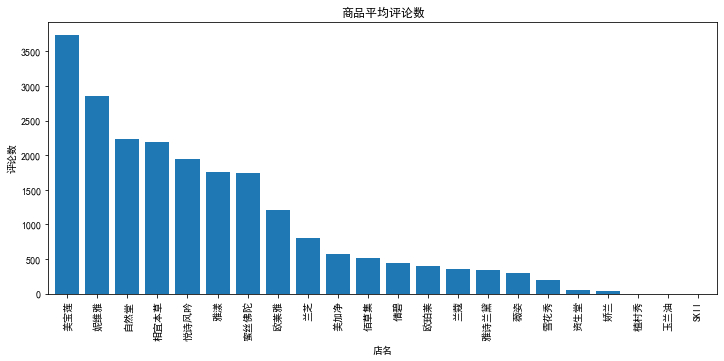

In [371]:
plt.figure(figsize = (12,5))
data.groupby('店名').comment_count.mean().sort_values(ascending=False).plot(kind='bar',width=0.8)
plt.title('商品平均评论数')
plt.ylabel('评论数')
plt.show()

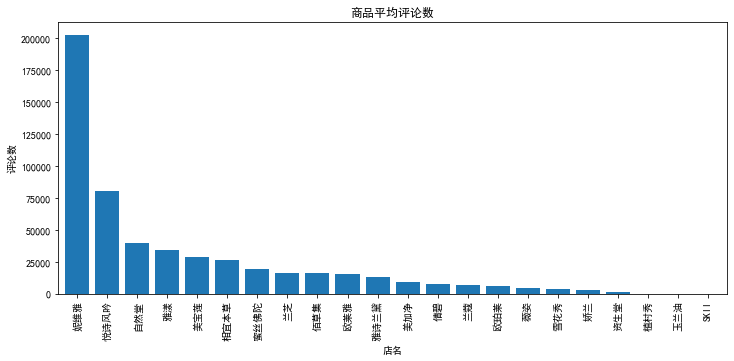

In [372]:
plt.figure(figsize = (12,5))
data.groupby('店名').comment_count.max().sort_values(ascending=False).plot(kind='bar',width=0.8)
plt.title('商品平均评论数')
plt.ylabel('评论数')
plt.show()

In [376]:
data.groupby('店名').id.count().sort_values(ascending=False)

店名
悦诗风吟    3021
佰草集     2264
欧莱雅     1942
雅诗兰黛    1810
倩碧      1703
美加净     1678
欧珀莱     1359
相宜本草    1313
妮维雅     1299
兰蔻      1285
娇兰      1193
自然堂     1175
玉兰油     1131
兰芝      1088
美宝莲      825
资生堂      821
植村秀      750
薇姿       746
雅漾       663
雪花秀      543
SKII     469
蜜丝佛陀     434
Name: id, dtype: int64

In [81]:
data.groupby('店名').id.count().index

Index(['SKII', '佰草集', '倩碧', '兰芝', '兰蔻', '妮维雅', '娇兰', '悦诗风吟', '植村秀', '欧珀莱',
       '欧莱雅', '玉兰油', '相宜本草', '美加净', '美宝莲', '自然堂', '薇姿', '蜜丝佛陀', '资生堂', '雅漾',
       '雅诗兰黛', '雪花秀'],
      dtype='object', name='店名')

In [80]:
data.groupby('店名').price.count().index

Index(['SKII', '佰草集', '倩碧', '兰芝', '兰蔻', '妮维雅', '娇兰', '悦诗风吟', '植村秀', '欧珀莱',
       '欧莱雅', '玉兰油', '相宜本草', '美加净', '美宝莲', '自然堂', '薇姿', '蜜丝佛陀', '资生堂', '雅漾',
       '雅诗兰黛', '雪花秀'],
      dtype='object', name='店名')

## 销售数量及金额散点图

- 热度与销量呈现一定的正相关
- 美宝莲热度第一，销量第二，妮维雅热度第二，销量第四，两者价格均相对较低
- 价格低的品牌热度和销量相对较高，价格高的品牌热度和销量相对较低

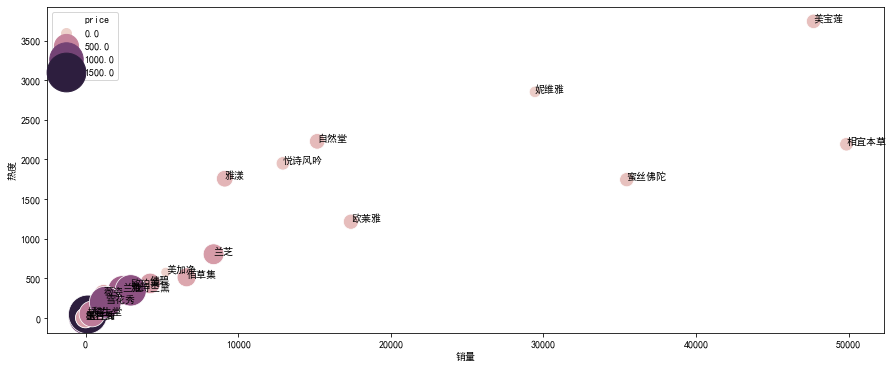

In [378]:
plt.figure(figsize=(15,6))
# Y轴 评论代表关注度，X轴 销售总量代表卖得好，图内散点圆圈大小代表价格
x = data.groupby('店名')['sale_count'].mean()
y = data.groupby('店名')['comment_count'].mean()
s = data.groupby('店名')['price'].mean()
txt = data.groupby('店名').id.count().index
# hue:对输入数据进行分组的序列，使用不同颜色对各组的数据加以区分 # annotate注解；自动编号；批注 
sns.scatterplot(x,y,size=s,hue=s,sizes=(100,1500),data=data)
for i in range(len(txt)):
    plt.annotate(txt[i],xy=(x[i],y[i]))
plt.ylabel('热度')
plt.xlabel('销量')
plt.legend(loc='upper left')
plt.show()

## 品牌价格箱线图

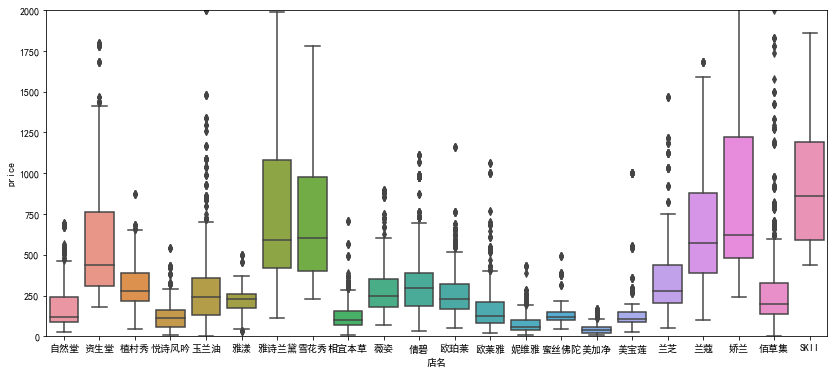

In [383]:
plt.figure(figsize=(14,6))
sns.boxplot(x='店名',y='price',data=data)
plt.ylim(0,2000)
# Y轴刻度缩小为0-3000 展示美化
plt.show()

## 品牌价格均值柱状图

In [384]:
data.groupby('店名').price.sum()
avg_price=data.groupby('店名').price.sum()/data.groupby('店名').price.count()
avg_price

店名
SKII    1011.727079
佰草集      289.823171
倩碧       346.092190
兰芝       356.615809
兰蔻       756.400778
妮维雅       73.789053
娇兰      1361.043588
悦诗风吟     121.245945
植村秀      311.786667
欧珀莱      276.218543
欧莱雅      167.282698
玉兰油      329.657294
相宜本草     122.958446
美加净       44.694619
美宝莲      148.757576
自然堂      180.130213
薇姿       281.085791
蜜丝佛陀     142.118894
资生堂      577.438490
雅漾       212.618401
雅诗兰黛     872.470718
雪花秀      901.082873
Name: price, dtype: float64

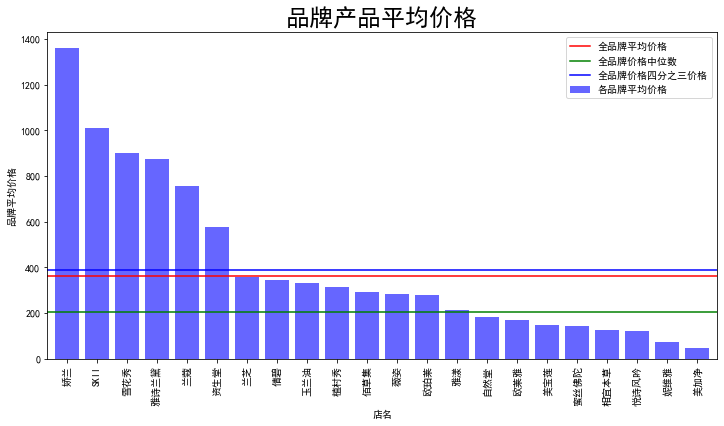

In [403]:
fig = plt.figure(figsize=(12,6))
avg_price.sort_values(ascending=False).plot(kind='bar',width=0.8,alpha=0.6,color='b',label='各品牌平均价格')

# 均值线
y1 = data['price'].mean()
plt.axhline(y1,0,5,color='r',label='全品牌平均价格')

# 中位数线
y2 = data['price'].median()
plt.axhline(y2,0,5,color='g',label='全品牌价格中位数')

# 众数线
y3 = data['price'].quantile(0.75)
plt.axhline(y3,0,5,color='blue',label='全品牌价格四分之三价格')

plt.ylabel('品牌平均价格')
plt.title('品牌产品平均价格',fontsize=24)
plt.legend(loc='best')
plt.show()

- 娇兰、SKII、雪花秀、雅诗兰黛、兰蔻、资生堂这几个国际大牌的产品价格很高，产品平均价格都在500以上，都是一线大牌； 
- 兰芝、倩碧、玉兰油、植村秀、佰草集、薇姿、雅漾的平均价格在300-400元左右，其中佰草集是最贵的国货品牌； 
- 美加净作为国货品牌，性价比高，平均价格最低，妮维雅的平均价格第二低，在100元左右； 
- 全品牌平均价格低于400元，除了前五个国际大牌其余品牌的平均价格都低于全品牌平均价格；

## 男性护肤品销量柱状图

In [436]:
data.head(2)

,id,title,price,sale_count,comment_count,店名,sub_type_all,main_type_all,是否男士专用,销售额,day
update_time,,,,,,,,,,,
2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,面霜类,护肤品,否,3713941.0,14
2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,乳液类,护肤品,否,1575668.0,14


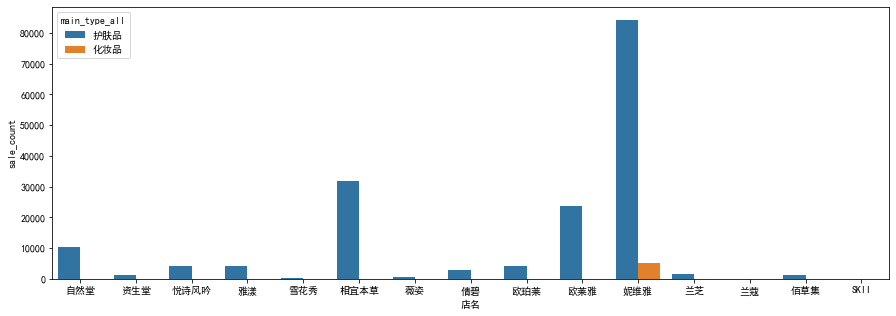

In [440]:
gender_data=data[data['是否男士专用']=='是']

gender_data_1=gender_data[(gender_data.main_type_all =='护肤品')| (gender_data.main_type_all=='化妆品')]

plt.figure(figsize = (15,5))
sns.barplot(x='店名',y='sale_count',hue='main_type_all',data =gender_data_1,saturation=0.75,ci=0,)
plt.show()

In [441]:
data['sub_type_all'].value_counts()

其他      13100
清洁类      2922
面霜类      2675
化妆水      1955
底妆类      1790
乳液类      1352
眼部护理     1114
精华类       727
口红类       715
眼部彩妆      604
防晒类       494
修容类        64
Name: sub_type_all, dtype: int64

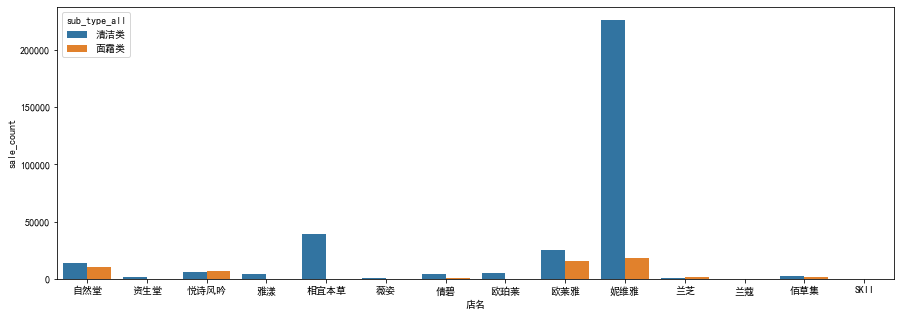

In [442]:
gender_data=data[data['是否男士专用']=='是']

gender_data_1=gender_data[(gender_data.sub_type_all =='清洁类')| (gender_data.sub_type_all=='面霜类')]

plt.figure(figsize = (15,5))
sns.barplot(x='店名',y='sale_count',hue='sub_type_all',data =gender_data_1,saturation=0.75,ci=0,)
plt.show()

## 男性销售额排名

In [443]:
data.head(1)

,id,title,price,sale_count,comment_count,店名,sub_type_all,main_type_all,是否男士专用,销售额,day
update_time,,,,,,,,,,,
2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,面霜类,护肤品,否,3713941.0,14


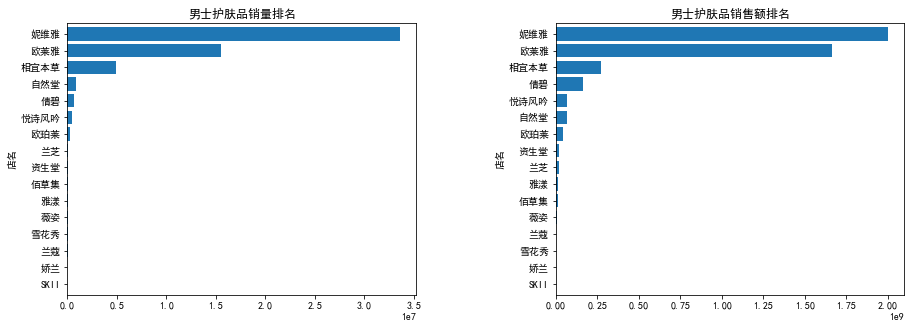

In [446]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(15,5))

gender_data.groupby('店名').sale_count.sum().sort_values(ascending=True).plot(kind='barh',width=0.8,ax=ax1)
ax1.set_title('男士护肤品销量排名')

gender_data.groupby('店名').销售额.sum().sort_values(ascending=True).plot(kind='barh',width=0.8,ax=ax2)
ax2.set_title('男士护肤品销售额排名')

plt.subplots_adjust(wspace=0.4)
plt.show()

## 双11前后销售曲线图

- 高峰在11号前几天，双十一之前商家提前预热，很大的优惠
- 当天销量最低避免网络高峰，在双11号之前提前购买
- 后3天，销量远不如双十一，逐步增长，商家持续打折有优惠，购物余热起作用

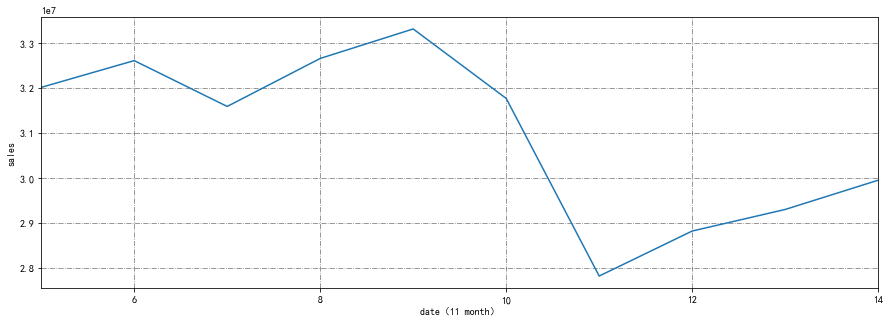

In [453]:
from matplotlib.pyplot import MultipleLocator
# MultipleLocator多重定位器 5代表每隔5个

plt.figure(figsize = (15,5))
day_sale=data.groupby('day')['sale_count'].sum()
day_sale.plot()
# grid栅格；格子；格网
plt.grid(linestyle="-.",color="black",axis="both",alpha=0.5)

x_major_locator=MultipleLocator(2)  
# MultipleLocator(5)) 5代表每隔5个
# 把x轴的刻度间隔设置为1，并存在变量里

ax=plt.gca()  #ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
plt.xlabel('date（11 month）')
plt.ylabel('sales')
plt.show();